In [1]:
%matplotlib inline

import numpy as np
import modisco

In [ ]:
def one_hot_encode_along_channel_axis(sequence):
    #theano dim ordering, uses row axis for one-hot
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1

In [6]:
scores = np.load("task0importancescores.npy")
hyp_scores = np.load("task0hypimpscores.npy")
onehot_data = (np.abs(scores) > 0)*1.0
print(scores.shape)
print(hyp_scores.shape)

(2000, 200, 4)
(2000, 200, 4)


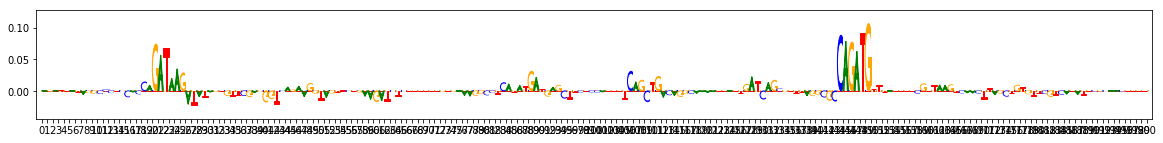

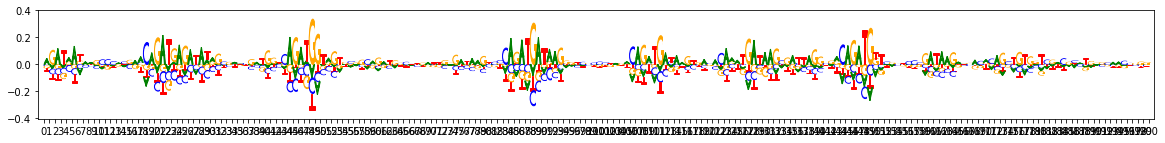

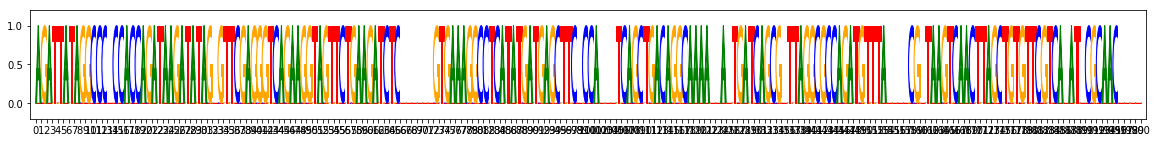

In [4]:
import modisco.visualization
from modisco.visualization import viz_sequence

viz_sequence.plot_weights(scores[0])
viz_sequence.plot_weights(hyp_scores[0])
viz_sequence.plot_weights(onehot_data[0])

On task task0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Got 11859 coords
Computing thresholds
Bandwidth calculated: 0.038807619363069534


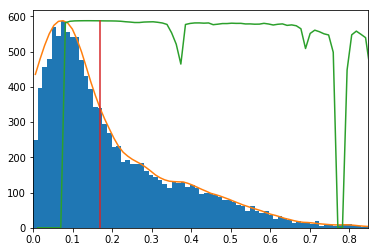

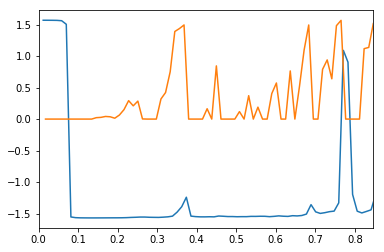

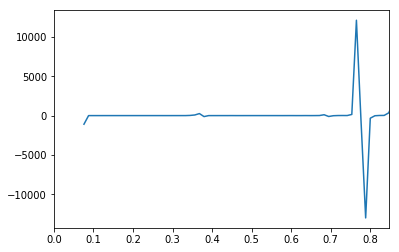

Computed threshold 0.16936665236949922
5126 coords remaining after thresholding
After resolving overlaps, got 5126 seqlets
2 activity patterns with support >= 200 out of 3 possible patterns
Metacluster sizes:  [3886, 1240]
Idx to activities:  {0: '1', 1: '-1'}
On metacluster 1
Metacluster size 1240
Relevant tasks:  ('task0',)
Relevant signs:  (-1,)
(Round 1) num seqlets: 1240
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings


MemoryError: Error allocating 97484800 bytes of device memory (out of memory).
Apply node that caused the error: GpuDnnConv{algo='small', inplace=False}(GpuContiguous.0, CudaNdarrayConstant{[[[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 1.]
   [0. 0. 0. 1.]
   [0. 0. 0. 1.]]]


 [[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 1.]
   [0. 0. 0. 1.]
   [0. 0. 0. 1.]]]


 [[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 1.]
   [0. 0. 0. 1.]
   [0. 0. 0. 1.]]]


 ...


 [[[0. 0. 1. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [1. 0. 0. 0.]]]


 [[[0. 1. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [1. 0. 0. 0.]]]


 [[[1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [1. 0. 0. 0.]]]]}, GpuAllocEmpty.0, GpuDnnConvDesc{border_mode='valid', subsample=(1, 1), conv_mode='conv', precision='float32'}.0, Constant{1.0}, Constant{0.0})
Toposort index: 38
Inputs types: [CudaNdarrayType(float32, (False, True, False, False)), CudaNdarrayType(float32, (False, True, False, False)), CudaNdarrayType(float32, 4D), <theano.gof.type.CDataType object at 0x124743c90>, Scalar(float32), Scalar(float32)]
Inputs shapes: [(20, 1, 41, 4), (35840, 1, 8, 4), (20, 35840, 34, 1), 'No shapes', (), ()]
Inputs strides: [(164, 0, 4, 1), (32, 0, 4, 1), (1218560, 34, 1, 0), 'No strides', (), ()]
Inputs values: ['not shown', 'not shown', 'not shown', <capsule object NULL at 0x10b750210>, 1.0, 0.0]
Inputs name: ('image', 'kernel', 'output', 'descriptor', 'alpha', 'beta')

Outputs clients: [[GpuSubtensor{::, ::, ::, int64}(GpuDnnConv{algo='small', inplace=False}.0, Constant{0})]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [7]:
import h5py
import numpy as np
%matplotlib inline
import modisco
reload(modisco)
import modisco.backend
reload(modisco.backend.theano_backend)
reload(modisco.backend)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat.core)
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.cluster
reload(modisco.cluster.core)
reload(modisco.cluster.phenograph.core)
reload(modisco.cluster.phenograph.cluster)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)

tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow()(
                task_names=["task0"],
                contrib_scores={'task0': scores},
                hypothetical_contribs={'task0': hyp_scores},
                one_hot=onehot_data)

In [11]:
import h5py
import modisco.util
reload(modisco.util)
!rm task0_results.hdf5
grp = h5py.File("task0_results.hdf5")
tfmodisco_results.save_hdf5(grp)

2
pattern_0
('total seqlets:', 216)
fwd:


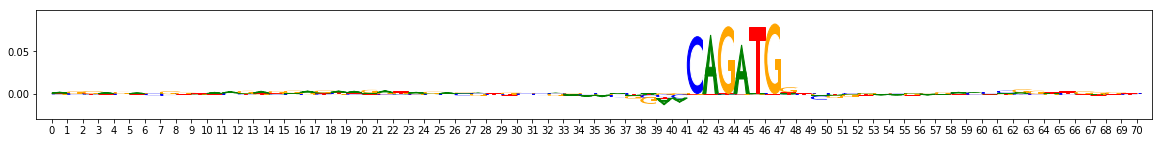

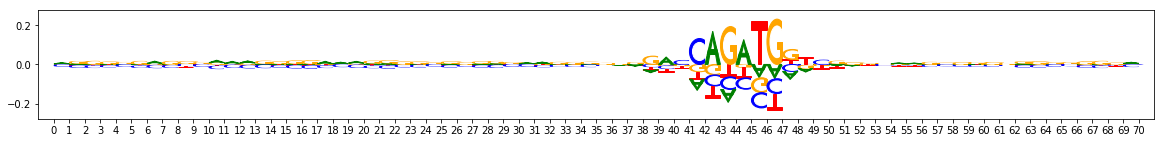

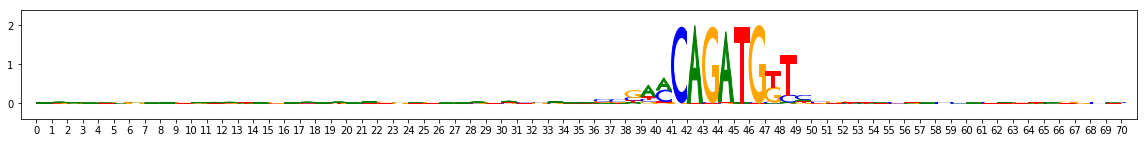

reverse:


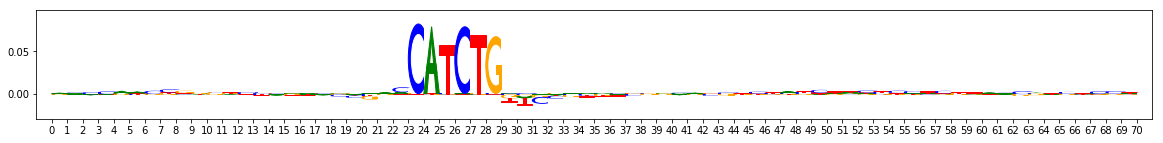

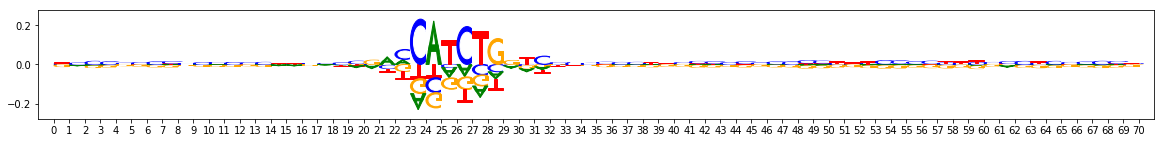

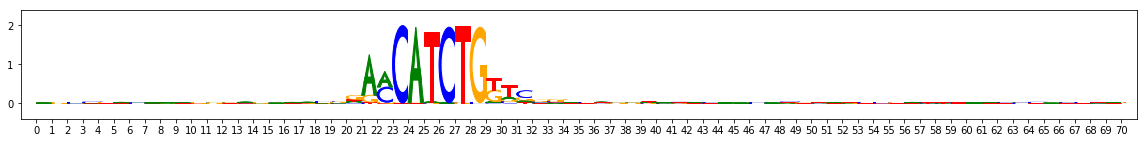

pattern_1
('total seqlets:', 73)
fwd:


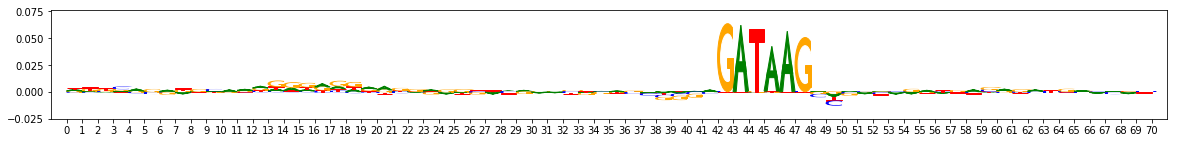

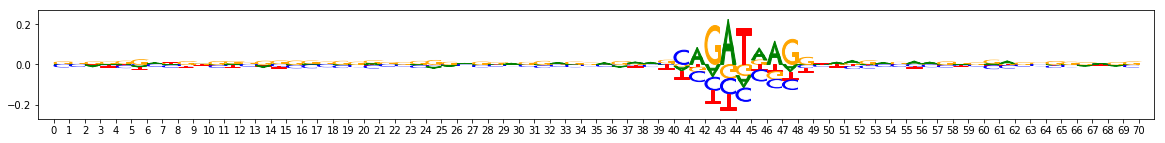

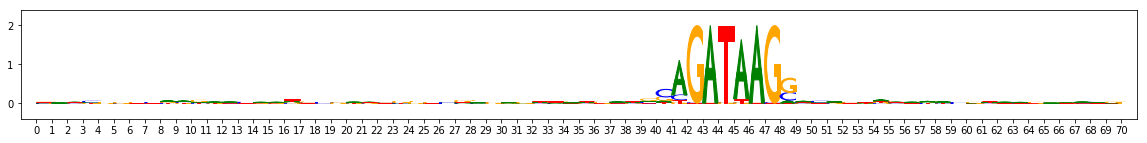

reverse:


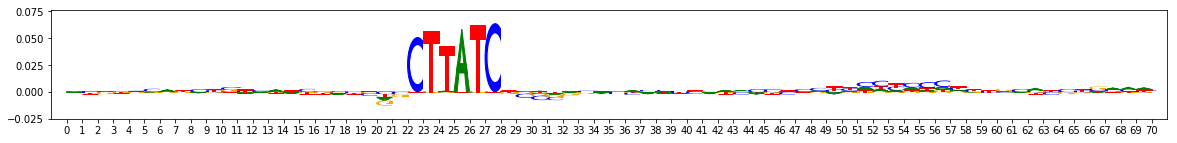

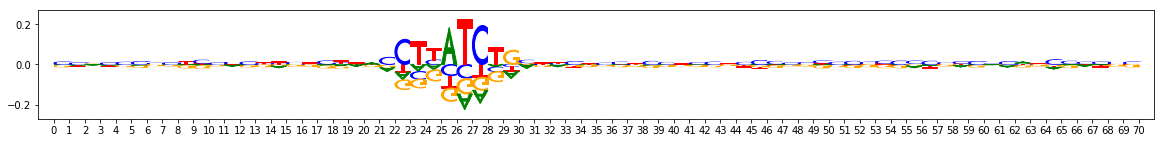

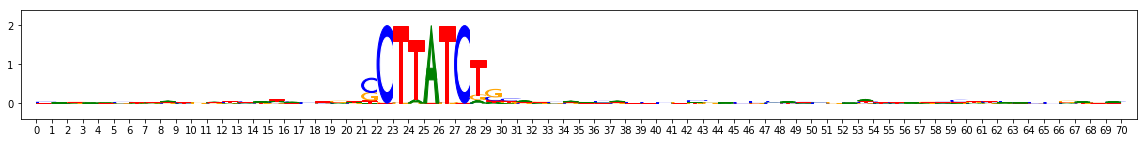

In [17]:
from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

import sklearn.decomposition
import sklearn.manifold

hdf5_results = h5py.File("task0_results.hdf5")

#patterns = (tfmodisco_results
#            .metacluster_idx_to_submetacluster_results[0]
#            .seqlets_to_patterns_result.patterns);
patterns = (list(hdf5_results
                 ["metacluster_idx_to_submetacluster_results"]
                 ["metacluster0"]
                 ["seqlets_to_patterns_result"]
                 ["patterns"]["all_pattern_names"]))
print(len(patterns))
pattern_grp = (hdf5_results
                 ["metacluster_idx_to_submetacluster_results"]
                 ["metacluster0"]
                 ["seqlets_to_patterns_result"]
                 ["patterns"])

for pattern_name in patterns:
    pattern = pattern_grp[pattern_name]
    print(pattern_name)
    print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
    #pattern.plot_counts(counts=aggregated_seqlet.get_per_position_seqlet_center_counts())
    background = np.array([0.27, 0.23, 0.23, 0.27])
    print("fwd:")
    viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                    background=background))

    print("reverse:")
    viz_sequence.plot_weights(pattern["task0_contrib_scores"]["rev"])
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["rev"])
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                    background=background))

In [15]:
pattern.keys()

[u'seqlets_and_alnmts',
 u'sequence',
 u'task0_contrib_scores',
 u'task0_hypothetical_contribs']